In [62]:
import numpy as np  # Importing NumPy library for numerical computations
import matplotlib.pyplot as plt  # Importing matplotlib library for data visualization
import data_utils  # Importing custom data utilities module
import download  # Importing custom download module for downloading data



In [63]:
def download_data():
    # Define the URL from which to download the CIFAR-10 dataset.
    url = "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"
    
    # Define the directory where the downloaded data will be saved.
    download_dir = "./data"
    
    # Call the function to download and extract the dataset, if it hasn't been downloaded already.
    download.maybe_download_and_extract(url, download_dir)


In [64]:
class KNearestNeighbor(object):
    def __init__(self):
        pass

    def train(self, X, y):
        self.X_train = X.reshape(X.shape[0], -1)
        self.y_train = y

    def predict(self, X, k=1, num_loops=0):
            if num_loops == 0:
                dists = self.compute_distances(X)
            else:
                raise ValueError('Invalid value %d for num_loops' % num_loops)
            return self.predict_labels(dists, k=k)

    def compute_distances(self, X):
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train))
        # Calculate Euclidean distances between each test example (in 'X') and every training example
        for i in range(num_test):
        test_sample = X[i, :]
        for j in range(num_train):
            train_sample = self.X_train[j, :]
            # Compute squared Euclidean distance
            dist_squared = np.sum(np.square(test_sample - train_sample))
            # Square root the distance to get the Euclidean distance
            dists[i, j] = np.sqrt(dist_squared)
        return dists

    def predict_labels(self, dists, k=1):
        num_test = dists.shape[0]
        y_pred = np.zeros(num_test)
        # Find the k nearest neighbors for each test example
        for i in range(num_test):
        # Sort distances in ascending order (closest first) and get indices
        sorted_indices = np.argsort(dists[i])[:k]
        # Get the labels of the k nearest neighbors from training data
        k_nearest_labels = self.y_train[sorted_indices]
        # Majority vote to predict the label for the test example
        mode = np.argmax(np.bincount(k_nearest_labels))
        y_pred[i] = mode
        return y_pred



IndentationError: expected an indented block (3757322723.py, line 22)

In [ ]:
def visualize_data(X_train, y_train):
    # Define the classes corresponding to CIFAR-10 categories
    classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    # Calculate the total number of classes
    num_classes = len(classes)
    # Number of samples to display per class
    samples_per_class = 7
    
    # Loop through each class
    for y, cls in enumerate(classes):
        # Get indices of training examples belonging to the current class
        idxs = np.flatnonzero(y_train == y)
        # Randomly choose 'samples_per_class' number of samples from the current class without replacement
        idxs = np.random.choice(idxs, samples_per_class, replace=False)
        
        # Loop through each selected sample for the current class
        for i, idx in enumerate(idxs):
            # Calculate the index for subplot placement
            plt_idx = i * num_classes + y + 1
            # Create a subplot for the current sample
            plt.subplot(samples_per_class, num_classes, plt_idx)
            # Display the image corresponding to the current sample
            plt.imshow(X_train[idx].astype('uint8'))
            # Turn off axis labels
            plt.axis('off')
            # Add class label as title for the first sample of each class
            if i == 0:
                plt.title(cls)
    # Show the plot containing visualized data
    plt.show()


Data has apparently already been downloaded and unpacked.
Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)
(10000, 3072) (1000, 3072)
Got 296 / 1000 correct with k=5 => accuracy: 0.296

Printing our 5-fold accuracies for varying values of k:
k = 1, accuracies = [0.577, 0.568, 0.565, 0.549, 0.554]
k = 3, accuracies = [0.575, 0.548, 0.557, 0.535, 0.531]
k = 5, accuracies = [0.589, 0.568, 0.595, 0.55, 0.557]
k = 8, accuracies = [0.597, 0.592, 0.568, 0.548, 0.572]
k = 10, accuracies = [0.605, 0.574, 0.568, 0.532, 0.57]


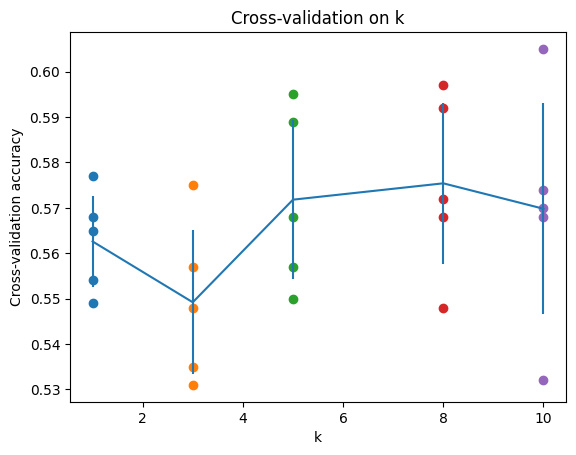

Best k found through cross-validation: 8
Got 572 / 1000 correct on test data => accuracy: 0.572000


In [65]:

if __name__ == "__main__":
    download_data()
    cifar10_dir = './data/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = data_utils.load_CIFAR10(cifar10_dir)

    print('Training data shape: ', X_train.shape)
    print('Training labels shape: ', y_train.shape)
    print('Test data shape: ', X_test.shape)
    print('Test labels shape: ', y_test.shape)

    # Subsample the data for more efficient code execution in this example
    num_training = 10000
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]

    num_test = 1000
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Reshape the data: flatten the image data into rows
    X_train = np.reshape(X_train, (X_train.shape[0], -1))
    X_test = np.reshape(X_test, (X_test.shape[0], -1))
    print(X_train.shape, X_test.shape)  # Expected shapes: (10000, 3072) and (1000, 3072) respectively

    classifier = KNearestNeighbor()
    classifier.train(X_train, y_train)
    y_test_pred = classifier.predict(X_test, k=5)

    num_correct = np.sum(y_test_pred == y_test)
    accuracy = float(num_correct) / num_test
    print(f'Got {num_correct} / {num_test} correct with k=5 => accuracy: {accuracy:.3f}')

    # Cross-validation to find the best k
    num_folds = 5
    k_choices = [1, 3, 5, 8, 10]

    X_train_folds = np.array_split(X_train, num_folds)
    y_train_folds = np.array_split(y_train, num_folds)
    k_to_accuracies = {}
    for k in k_choices:
        k_to_accuracies[k] = []
        for num_knn in range(0,num_folds):
            X_test = X_train_folds[num_knn]
            y_test = y_train_folds[num_knn]
            X_train = X_train_folds
            y_train = y_train_folds
            temp = np.delete(X_train,num_knn,0)
            X_train = np.concatenate((temp),axis = 0)
            y_train = np.delete(y_train,num_knn,0)
            y_train = np.concatenate((y_train),axis = 0)
            classifier = KNearestNeighbor()
            classifier.train(X_train, y_train)
            dists = classifier.compute_distances(X_test)
            y_test_pred = classifier.predict_labels(dists, k)
            num_correct = np.sum(y_test_pred == y_test)
            accuracy = float(num_correct) / num_test
    #         print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))
            k_to_accuracies[k].append(accuracy)
    
    # for k in k_choices:
    #     k_to_accuracies[k] = []
    #     for fold in range(num_folds):
    #         X_val_fold = X_train_folds[fold]
    #         y_val_fold = y_train_folds[fold]
    #         # y_train_fold = np.concatenate([y_train_folds[i] for i in range(num_folds) if i != fold])
    #         # X_train_fold = np.concatenate([X_train_folds[i] for i in range(num_folds) if i != fold])
            
    #         X_train_fold = np.concatenate(X_train_folds[:num_folds] + X_train_folds[num_folds + 1:])
    #         y_train_fold = np.concatenate(y_train_folds[:num_folds] + y_train_folds[num_folds + 1:])
    
    #         classifier = KNearestNeighbor()
    #         classifier.train(X_train_fold, y_train_fold)
    #         y_val_pred = classifier.predict(X_val_fold, k=k)

    #         accuracy = np.mean(y_val_pred == y_val_fold)
    #         k_to_accuracies[k].append(accuracy)

    print("\nPrinting our 5-fold accuracies for varying values of k:")
    for k in sorted(k_to_accuracies):
        print(f'k = {k}, accuracies = {k_to_accuracies[k]}')

    # Plotting the accuracies
    plt.figure()
    for k in k_choices:
        accuracies = k_to_accuracies[k]
        plt.scatter([k] * len(accuracies), accuracies)

    accuracies_mean = np.array([np.mean(v) for k, v in sorted(k_to_accuracies.items())])
    accuracies_std = np.array([np.std(v) for k, v in sorted(k_to_accuracies.items())])
    plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
    plt.title('Cross-validation on k')
    plt.xlabel('k')
    plt.ylabel('Cross-validation accuracy')
    plt.savefig('cross-validation_accuracy.jpg')
    plt.show()

    best_k = max(k_to_accuracies, key=lambda k: np.mean(k_to_accuracies[k]))
    print(f'Best k found through cross-validation: {best_k}')

    classifier = KNearestNeighbor()
    classifier.train(X_train, y_train)
    y_test_pred = classifier.predict(X_test, k=best_k)
    num_correct = np.sum(y_test_pred == y_test)
    accuracy = float(num_correct) / num_test
    print('Got %d / %d correct on test data => accuracy: %f' % (num_correct, num_test, accuracy))

In [ ]:
if __name__ == "__main__":

    # Download CIFAR10 data and store it in current directory if you have not done it.
    #download_data()
    cifar10_dir = './data/cifar-10-batches-py'

    # Load training and testing data from CIFAR10 dataset
    X_train, y_train, X_test, y_test = data_utils.load_CIFAR10(cifar10_dir)

    # Checking the size of the training and testing data
    print('Training data shape: ', X_train.shape)
    print('Training labels shape: ', y_train.shape)
    print('Test data shape: ', X_test.shape)
    print('Test labels shape: ', y_test.shape)

    #Visualize the data if you want
    #visualize_data(X_train, y_train)

    # Memory error prevention by subsampling data. We sample 10000 training examples and 1000 test examples.
    num_training = 10000
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]

    num_test = 1000
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # YOUR CODE HERE
    # Reshape data and place into rows. Flatten the training and test data so each row 
    # consists of all pixels of an example
    '''
    

    ''' 
    print(X_train.shape, X_test.shape) # X_train should be (10000, 3072) and X_test should be (1000, 3072)

    # Performing KNN
    classifier = KNearestNeighbor()
    # YOUR CODE HERE
    # Use the KNearestNeighbour classifier to do as follows:
    # 1) Initialize classifier with training data
    # 2) Use classifier to compute distances from each test example in X_test to every training example
    # 3) Use classifier to predict labels of each test example in X_test using k=5 
    ''' 



    '''
    num_correct = np.sum(y_test_pred == y_test) # number of test examples correctly predicted, where y_test_pred
                                                # should contain labels predicted by classifier
    accuracy = float(num_correct) / num_test
    print('Got %d / %d correct with k=5 => accuracy: %f' % (num_correct, num_test, accuracy))
    # Accuracy above should be ~ 29-30%

    # Perform 5-fold cross validation to find optimal k from choices below
    num_folds = 5
    k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]

    X_train_folds = []
    y_train_folds = []
    # Training data is split into 5 folds
    X_train_folds = np.array_split(X_train,num_folds)
    y_train_folds = np.array_split(y_train,num_folds)
    k_to_accuracies = {} # dictionary to hold validation accuracies for each k 


    for k in k_choices:
        k_to_accuracies[k] = [] # each key, k, should hold its list of 5 validation accuracies
        
        # For each fold of cross validation
        for num_knn in range(0,num_folds):
            # YOUR CODE HERE
            # 1) Split training data into validation fold and training folds
            # 2) Inititialize classifier with training folds and compute distances between 
            #    examples in validation fold and training folds
            # 3) Use classifier to predict labels of valdation fold for given k value
            '''













            '''
            # number of test examples correctly predicted, where y_test_pred contains labels
            # predicted by classifier on validation fold
            num_correct = np.sum(y_test_pred == y_test) 
            accuracy = float(num_correct) / num_test
            # print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))
            k_to_accuracies[k].append(accuracy)


    print("Printing our 5-fold accuracies for varying values of k:")
    print()
    for k in sorted(k_to_accuracies):
        for accuracy in k_to_accuracies[k]:
            print('k = %d, accuracy = %f' % (k, accuracy))
    
    for k in sorted(k_to_accuracies):
        print('k = %d, avg. accuracy = %f' % (k, sum(k_to_accuracies[k])/5))
    
    for k in k_choices:
        accuracies = k_to_accuracies[k]
        plt.scatter([k] * len(accuracies), accuracies)

    # plot the trend line with error bars that correspond to standard deviation

    accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_to_accuracies.items())])
    accuracies_std = np.array([np.std(v) for k,v in sorted(k_to_accuracies.items())])
    plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
    plt.title('Cross-validation on k')
    plt.xlabel('k')
    plt.ylabel('Cross-validation accuracy')
    plt.savefig('cross-validation_accuracy.jpg')

    # YOUR CODE HERE
    # Choose best value of k based on cross-validation results
    # Intialize classifier and predict labels of test data, X_test, using best value of k
    '''
    best_k =





    '''
    # Computing and displaying the accuracy for best k found during cross-validation
    num_correct = np.sum(y_test_pred == y_test)
    accuracy = float(num_correct) / num_test
    print('Got %d / %d correct on test data => accuracy: %f' % (num_correct, num_test, accuracy))
    # Accuracy above should be ~ 57-58%


